## CSC 84020 HW2
## Name: Subhadarshi Panda and Avinash Jairam
## ID Nos: 23729887 and 15393542

In [1]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

# supress warnings
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


##### load dataset

In [7]:
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/gdrive')

# load the dataset
filename = 'gdrive/My Drive/Colab Notebooks/OnlineNewsPopularity/HW2/data/Sensorless_drive_diagnosis.txt'
dataset = pd.read_csv(filename, delimiter=' ', header=None)


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### Descriptive Statistics

##### shape of data

In [8]:
print(dataset.shape)

(58509, 49)


##### first 20 rows of data

In [9]:
print(dataset.head(20))

              0             1             2   ...      46      47  48
0  -3.014600e-07  8.260300e-06 -1.151700e-05  ... -1.4996 -1.4996   1
1   2.913200e-06 -5.247700e-06  3.342100e-06  ... -1.5005 -1.5005   1
2  -2.951700e-06 -3.184000e-06 -1.592000e-05  ... -1.4985 -1.4985   1
3  -1.322600e-06  8.820100e-06 -1.587900e-05  ... -1.4975 -1.4976   1
4  -6.836600e-08  5.666300e-07 -2.590600e-05  ... -1.4959 -1.4959   1
5  -9.584900e-07  5.214300e-08 -4.735900e-05  ... -1.4972 -1.4973   1
6  -1.783700e-06  1.303600e-06 -3.785100e-05  ... -1.4954 -1.4953   1
7  -2.566600e-06 -1.679500e-07  1.483800e-05  ... -1.4968 -1.4968   1
8  -5.474000e-06  1.086500e-07 -1.097200e-05  ... -1.4947 -1.4947   1
9   2.825600e-06  6.067600e-06  1.182100e-04  ... -1.4943 -1.4943   1
10 -1.382900e-06 -6.952600e-07 -2.157100e-07  ... -1.4966 -1.4967   1
11 -6.573800e-07 -3.951900e-07  3.186800e-05  ... -1.4970 -1.4970   1
12 -5.762700e-06 -1.765900e-06  5.837500e-06  ... -1.4980 -1.4980   1
13 -2.236600e-06 -1.

##### descriptions

In [10]:
print(dataset.describe())

                 0             1   ...            47            48
count  58509.000000  5.850900e+04  ...  58509.000000  58509.000000
mean      -0.000003  1.439648e-06  ...     -1.497686      6.000000
std        0.000072  5.555429e-05  ...      0.003175      3.162305
min       -0.013721 -5.414400e-03  ...     -1.521300      1.000000
25%       -0.000007 -1.444400e-05  ...     -1.499500      3.000000
50%       -0.000003  8.804600e-07  ...     -1.498000      6.000000
75%        0.000002  1.877700e-05  ...     -1.496200      9.000000
max        0.005784  4.525300e-03  ...     -1.337100     11.000000

[8 rows x 49 columns]


##### class distribution

In [12]:
print(dataset.groupby(48).size())

48
1     5319
2     5319
3     5319
4     5319
5     5319
6     5319
7     5319
8     5319
9     5319
10    5319
11    5319
dtype: int64


##### data type of features

In [13]:
print(dataset.dtypes)

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
32    float64
33    float64
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
40    float64
41    float64
42    float64
43    float64
44    float64
45    float64
46    float64
47    float64
48      int64
dtype: object


##### data correlation

In [14]:
print(dataset.corr(method='pearson'))

          0         1         2   ...        46        47        48
0   1.000000  0.574463  0.268946  ... -0.203724 -0.205733 -0.017853
1   0.574463  1.000000  0.188993  ... -0.089415 -0.089916 -0.098850
2   0.268946  0.188993  1.000000  ... -0.061003 -0.061243 -0.030237
3   0.272271  0.261633  0.069828  ... -0.075473 -0.077045  0.005692
4   0.098113  0.198154  0.076619  ... -0.071136 -0.070909 -0.110669
5   0.099363  0.112018  0.040039  ... -0.036910 -0.036684 -0.035783
6   0.051068  0.038799 -0.014772  ... -0.000942 -0.001107 -0.407439
7   0.050196  0.037278 -0.015060  ... -0.000805 -0.000970 -0.407312
8   0.048455  0.036054 -0.021511  ... -0.000412 -0.000575 -0.407069
9   0.024870  0.039779 -0.006834  ... -0.024485 -0.023500 -0.340275
10  0.024787  0.039611 -0.006899  ... -0.024425 -0.023441 -0.340194
11  0.024450  0.039232 -0.007036  ... -0.024301 -0.023317 -0.340086
12 -0.514443 -0.212695 -0.151434  ...  0.225277  0.242473  0.003906
13 -0.333749 -0.144563 -0.101532  ...  0.180876 

##### data skew

In [18]:
print(dataset.skew())

0    -139.597413
1     -12.209919
2      -3.231163
3    -175.778935
4     -62.548594
5      -2.436558
6      -1.468722
7      -1.468106
8      -1.466851
9      -1.017130
10     -1.016869
11     -1.016463
12     46.450351
13     17.391509
14      4.643801
15     32.396501
16     21.652524
17      2.261594
18      0.209973
19      0.209931
20      0.210054
21      0.209081
22      0.209046
23      0.209139
24     50.071945
25     -0.003826
26     -0.033948
27     22.788079
28     -0.037098
29     -0.037807
30      0.032499
31      0.026876
32      0.027174
33     -0.509431
34     -0.517842
35     -0.529944
36    156.036482
37      5.092920
38      4.523684
39    125.396402
40     10.443554
41      3.821220
42     -0.292551
43     -0.293588
44     -0.281450
45      2.611426
46      2.601030
47      2.635189
48      0.000000
dtype: float64


### Visualization

##### histograms for all features

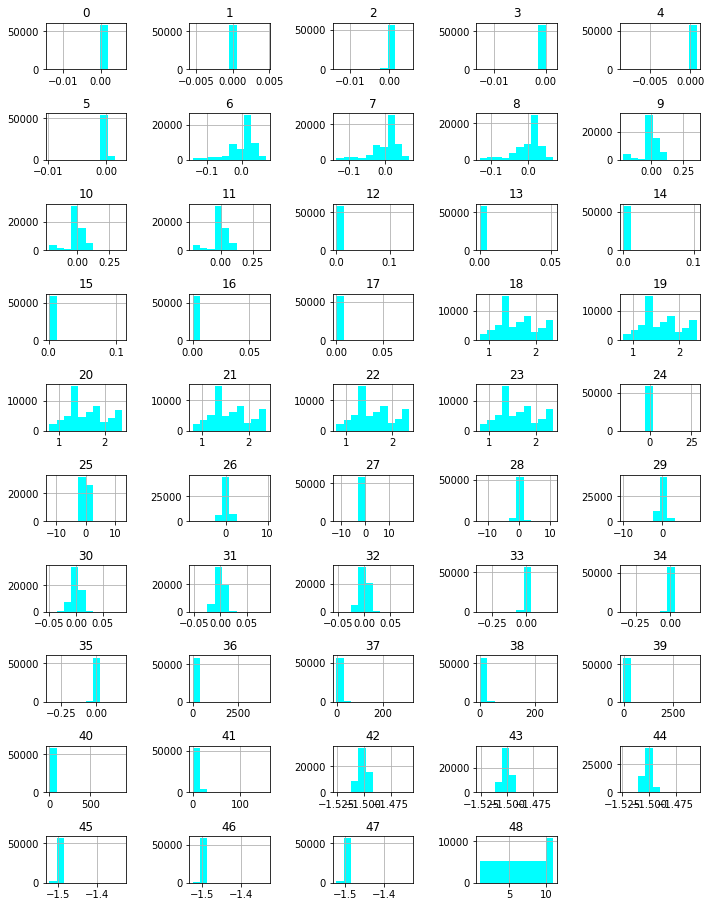

In [28]:
pylab.rcParams['figure.figsize'] = (10, 20)
dataset.hist(color='cyan', layout=(16, 5))
plt.tight_layout()
plt.show()

##### scatter matrix

In [30]:
dataset.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48],
           dtype='int64')

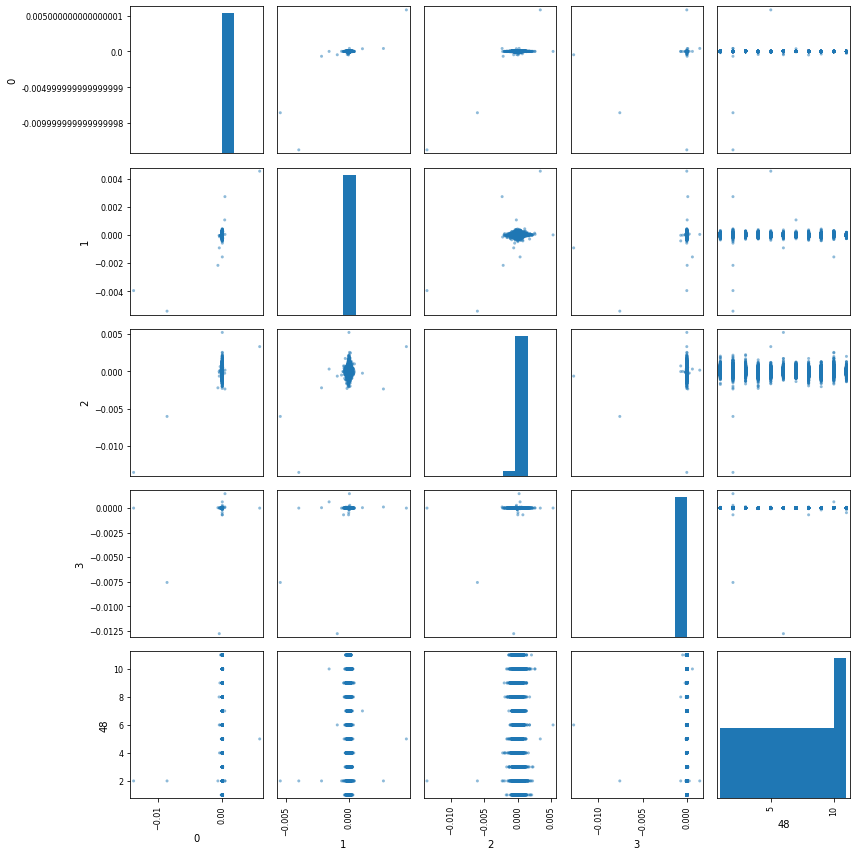

In [33]:
# We choose only four features and the class for visualization purpose
# (The  features chosen are 0, 1, 2, 3)
pylab.rcParams['figure.figsize'] = (12, 12)

scatter_matrix(dataset[[0, 1, 2, 3, 48]])
plt.tight_layout()
plt.show()

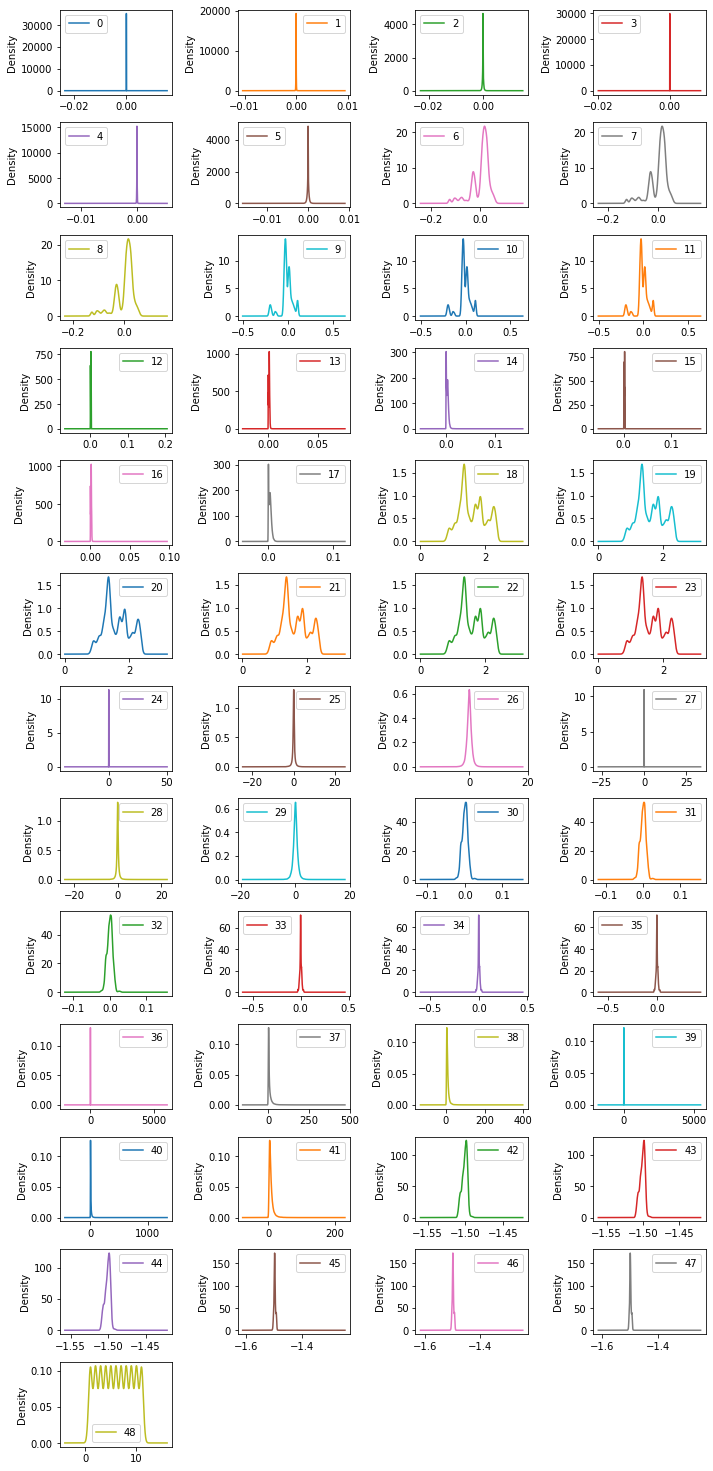

In [34]:
pylab.rcParams['figure.figsize'] = (10, 25)
dataset.plot(kind='density', subplots=True, layout=(16,4), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

##### correlation matrix plot

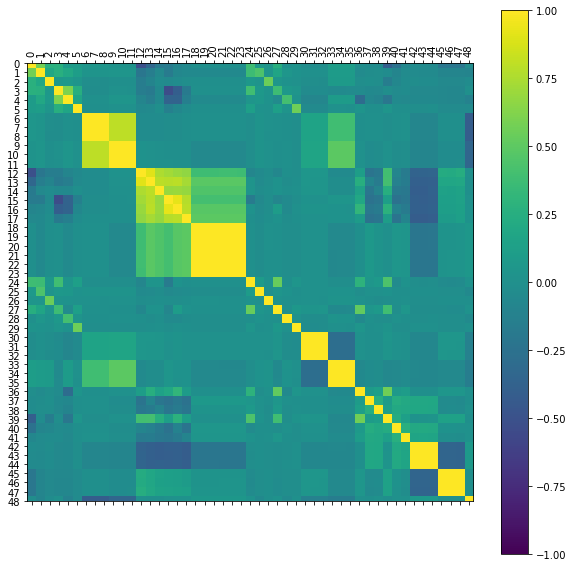

In [35]:
pylab.rcParams['figure.figsize'] = (10, 10)
correlations = dataset.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(dataset.columns),1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(dataset.columns, rotation=90)
ax.set_yticklabels(dataset.columns)
plt.show()
correlations = dataset.corr()

### Classification

##### prepare data

In [0]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:-1]
Y = array[:,-1]
validation_size = 0.20
seed = 122
X_train, X_validation, Y_train, Y_validation = \
train_test_split(X, Y, test_size=validation_size, random_state=seed)


##### spot-check algorithms

In [37]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: 0.547353 (0.032326)
LDA: 0.857073 (0.005235)
KNN: 0.115944 (0.002750)
CART: 0.982951 (0.002077)
NB: 0.765185 (0.012104)
SVM: 0.257098 (0.003425)


##### compare algorithms

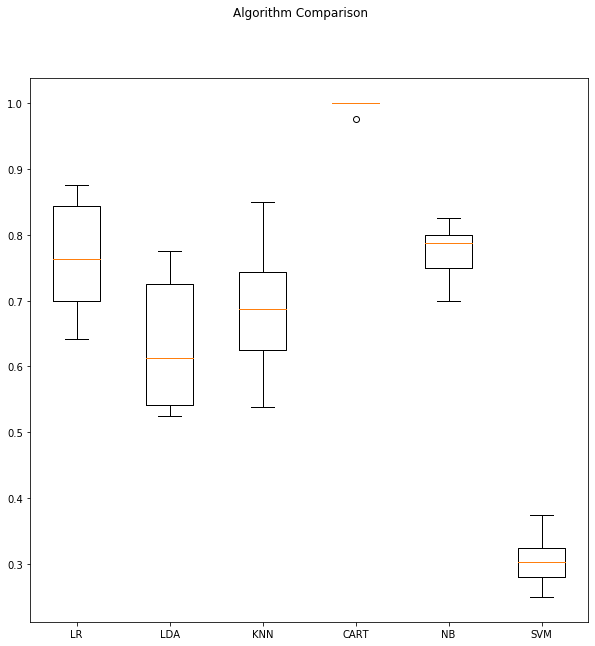

In [0]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

##### clearly, the best performing model is CART
##### make predictions on validation dataset using CART model

In [0]:
cart = DecisionTreeClassifier()
cart.fit(X_train, Y_train)
predictions = cart.predict(X_validation)
print('accuracy:', accuracy_score(Y_validation, predictions))
print('confusion matrix:\n', confusion_matrix(Y_validation, predictions))
print('classification report:\n', classification_report(Y_validation, predictions))

accuracy: 0.99
confusion matrix:
 [[34  0  0  0  0  0  0]
 [ 0 13  0  0  0  0  0]
 [ 0  0 19  0  0  0  0]
 [ 0  0  0 19  0  0  0]
 [ 0  0  0  0  8  0  0]
 [ 0  0  0  0  0  5  0]
 [ 0  0  0  0  0  1  1]]
classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        34
         1.0       1.00      1.00      1.00        13
         2.0       1.00      1.00      1.00        19
         3.0       1.00      1.00      1.00        19
         4.0       1.00      1.00      1.00         8
         5.0       0.83      1.00      0.91         5
         6.0       1.00      0.50      0.67         2

    accuracy                           0.99       100
   macro avg       0.98      0.93      0.94       100
weighted avg       0.99      0.99      0.99       100

